In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re

## 

## 1.C

In [20]:
current_path= Path().absolute()         # current path
test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [21]:
original_data_path= current_path/ "original_data"   # original data folder path
original_data_path.mkdir(exist_ok=True)             # making the folder

In [22]:
if test_path.exists():  # if the folders exist in test test, then move it to original
    shutil.move(test_path, original_data_path)
if train_path.exists():
    shutil.move(train_path, original_data_path)

In [23]:
experimental_small= current_path/"experiment_small_data"
experimental_small.mkdir(exist_ok=True)

experimental_small_train= experimental_small/"trian"
experimental_small_train.mkdir(exist_ok=True)

experimental_small_test= experimental_small/"test"
experimental_small_test.mkdir(exist_ok=True)

experimental_small_val= experimental_small/"val"
experimental_small_val.mkdir(exist_ok=True)

In [24]:
folders_delete = [  # list of folders to delete
    current_path / "test",
    current_path / "train",
]

for folder in folders_delete:   # delete folder if it exists
    if folder.exists():
        shutil.rmtree(folder)

## 1.A/B

In [25]:
original_data= current_path/"original_data" # path original data
test_data_path= original_data/"test" # new test data
train_data_path= original_data/"train"   # new train data

In [26]:
train_list= list(train_data_path.iterdir())  # list of the image train paths
test_list= list(test_data_path.iterdir())  # list of the image test paths

pictures= np.random.choice(train_list, 10)  # ten random paths

In [27]:
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

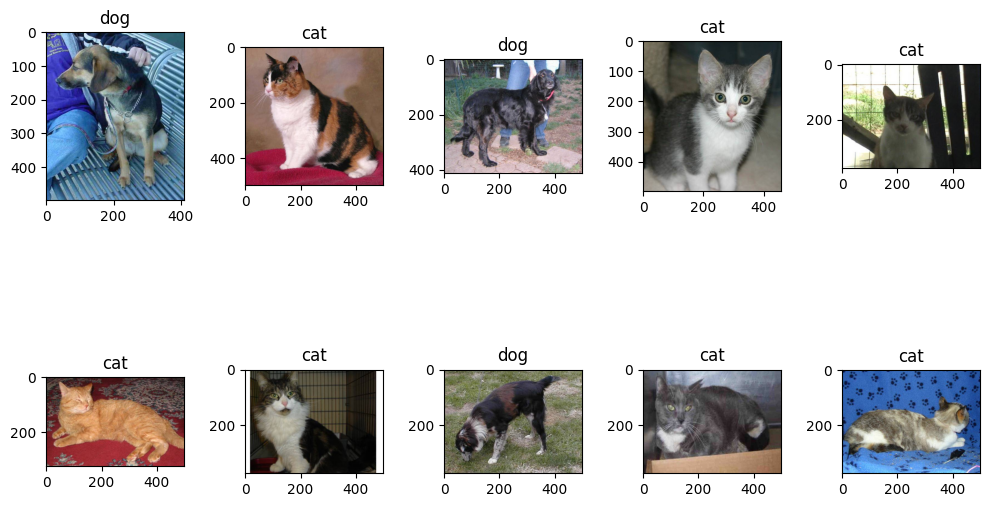

In [28]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data_path/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D

In [29]:
def dogs_cats(train_test_val:list, animal_needed:int):
    total_dogs= [dog for dog in train_test_val if 'dog' in dog.name]   # picking out all dogs
    np.random.shuffle(total_dogs)   # shuffle

    dogs= total_dogs[:animal_needed]    # picking number of dogs we need

    """Same thins for cats"""
    total_cats= [dog for dog in train_test_val if 'cat' in dog.name]
    np.random.shuffle(total_cats)

    cats= total_cats[:animal_needed]
    
    return dogs, cats

In [30]:
trian_dogs, train_cats= dogs_cats(train_list, 800)
test_dogs, test_cats= dogs_cats(test_list, 250)

print(f"train_dogs: {len(trian_dogs)}\ntrain_cats: {len(train_cats)}\ntest_dogs: {len(test_dogs)}\ntest_cats: {len(test_cats)}")

train_dogs: 800
train_cats: 800
test_dogs: 0
test_cats: 0


## fel eftersom test datan har randomiserade bilder, som bara har siffra som namn. Lista ut hur man kan få rätt mängd hundar och katter

In [31]:
train_data_paths= []
test_data_paths= []
val_data_paths= []

for dog, cat in zip(trian_dogs[:800], train_cats[:800]):    # taking out total 1600 for train
    train_data_paths.append(dog)
    train_data_paths.append(cat)
"""for dog, cat in zip(dogs[801:1050], cats[801:1050]):    # taking out total 498 test
    test_data.append(dog)
    test_data.append(cat)
for dog, cat in zip(dogs[1051:], cats[1051:]):  # taking out total 398 val
    val_data.append(dog)
    val_data.append(cat)"""

'for dog, cat in zip(dogs[801:1050], cats[801:1050]):    # taking out total 498 test\n    test_data.append(dog)\n    test_data.append(cat)\nfor dog, cat in zip(dogs[1051:], cats[1051:]):  # taking out total 398 val\n    val_data.append(dog)\n    val_data.append(cat)'

In [32]:
print(f"train_data: {train_data_paths}\ntest_data: {train_data_paths}")

train_data: [WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.11035.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.1578.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.2097.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.10786.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.160.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.1738.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.3294.jpg'), WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/ca